In [11]:
# Dependencies
from bs4 import BeautifulSoup
import requests
import pandas as pd

<html>
<head>
<style type="text/css">
    input[type="submit"] {
        margin: 43px 0 74px;
        padding: 10px 16px;
        line-height: 1.33;
        font-size: 14px;
        font-weight: 400;
        text-transform: uppercase;
        color: #FFF;
        background: #555;
        border: solid #555;
        border-width: 0 0 2px 0;
        border-radius: 2px;
        transition: all 200ms;
    }
        table table {
      width: 600px !important;
    }
    table div { /* logo */
      width: 100%;
      float: none;
      text-align: center;
    }
    table div + div { /* main content */
      width: 100%;
      float: left;
      text-align: left;
    }
    table div + div + div { /* trace */
      width: 100%;
      float: left;
      text-align: left;
    }
    table div + div + div + div { /* footer */
      width: 100%;
      float: none;
      clear: both;
      text-align: left;
    }
    @media (max-width: 630px) {
      table table {
        width: 96% !important;
  
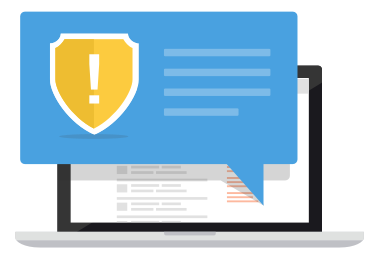

In [13]:
#Testing
linked = 'https://www.century21.com/real-estate/california/LSCA/'

response = requests.get(linked)
soup = BeautifulSoup(response.text, 'html.parser')
result = soup.find_all('div', class_='infinite-item')
result

In [3]:
#Set up list to hold response info
house_dict = []

In [4]:
# Loop through x pages of the website with filter of Single House
page_link = 'https://www.century21.com/real-estate/california/LSCA/?sn=5&sk=Y&pt=7&p={}'
for link in [page_link.format(page) for page in range(1,50)]:
    res = requests.get(link)
    new_soup = BeautifulSoup(res.text, 'html.parser')
    new_results = new_soup.find_all('div', class_='infinite-item')

    # Loop through returned results
    for result in new_results:
        # Error handling
        try:
            # Identify and return listing type
            listing_type = result.find('div', class_="pdp-listing-type").text
            # Identify and return price of House
            price = result.find('a', class_="listing-price").text
            # Identify and return number and street address of House
            street = result.find('div', class_="property-address").text
            # Identify and return city, state, and zip code of House
            city = result.find('div', class_="property-city").text
            zip_code = city.strip().replace("\n", "")
            City_state = zip_code[:-6]
            # Identify and return room number of House
            bed = result.find('div', class_="property-beds").find('strong').text
            # Identify and return bath number of House
            bath = result.find('div', class_="property-baths").find('strong').text
            # Identify and return half-bath number of House. If half-bath does not exist, it will return 0
            try:    
                half_bath = result.find('div', class_="property-half-baths").find('strong').text
            except:
                half_bath = "0"
                pass
            # Identify and return sqft of House
            sqft = result.find('div', class_="property-sqft").find('strong').text
            # Identify coordinate

            latitude = result.get("data-latitude")
            longitude = result.get("data-longitude")

            # Print results only if title, price, and link are available
            if (listing_type and price and street and city and bed and bath and sqft and latitude and longitude):
                house_obj = {
                "Listing_type": listing_type,
                "Price": price.strip().replace("\n", ""),
                "Street": street.strip().replace("\n", ""),
                "City": City_state[:-3],
                "State": City_state[-2:],
                "Zip_code": zip_code[-5:],
                "Bed": bed.strip().replace("\n", ""),
                "Half-bath": half_bath.strip().replace("\n", ""),
                "Bath": bath.strip().replace("\n", ""),
                "Square_Feet": sqft.strip().replace("\n", ""),
                "House_type": "Apartment",
                "Latitude": latitude,
                "Longitude": longitude
                }

                #Continue to add data into collection house_dict
                house_dict.append(house_obj)

        except AttributeError as e:
            continue
            # print(e)

print(house_dict)

[]


In [5]:
house_data = pd.DataFrame(house_dict)
house_data

""


In [6]:
# Export file as a CSV, without the Pandas index, but with the header
house_data.to_csv("Output/Q2-2018_Apartment_Data.csv", index=False, header=True)